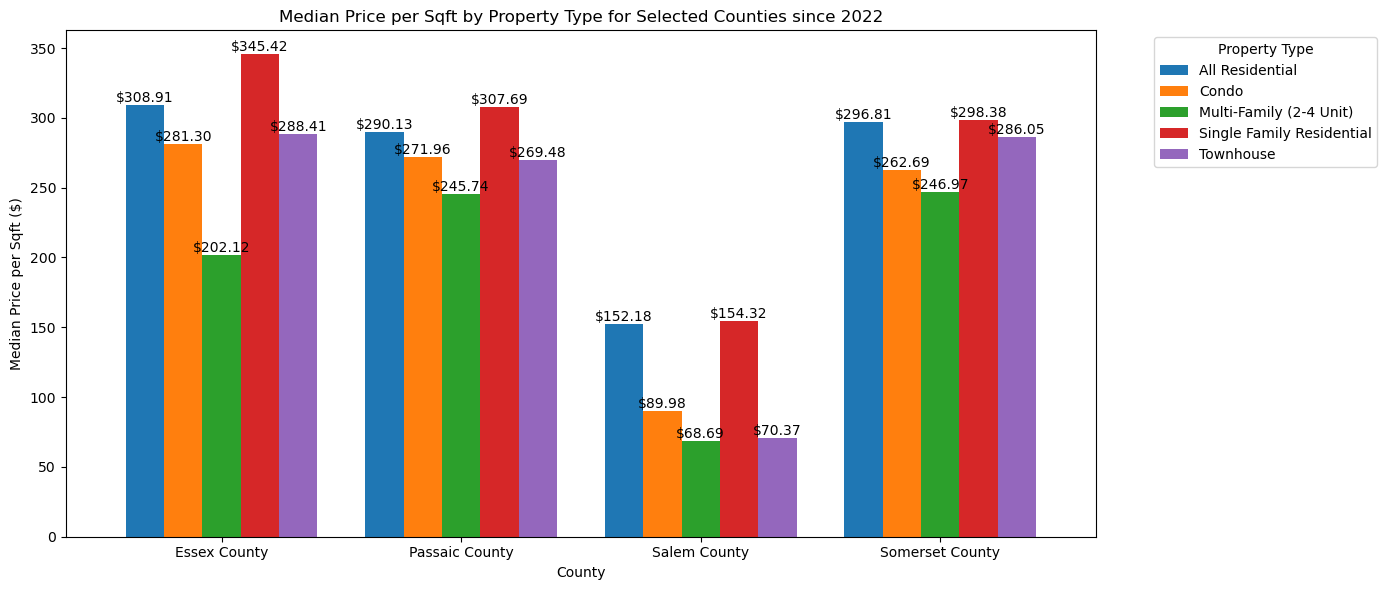

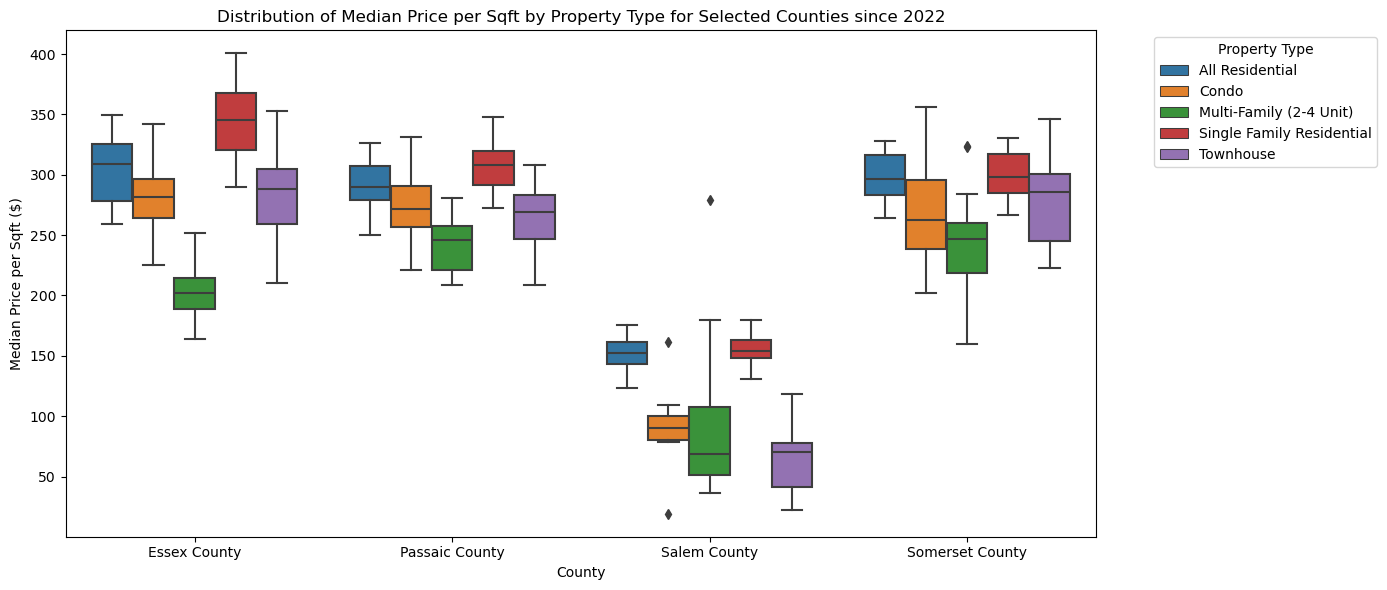

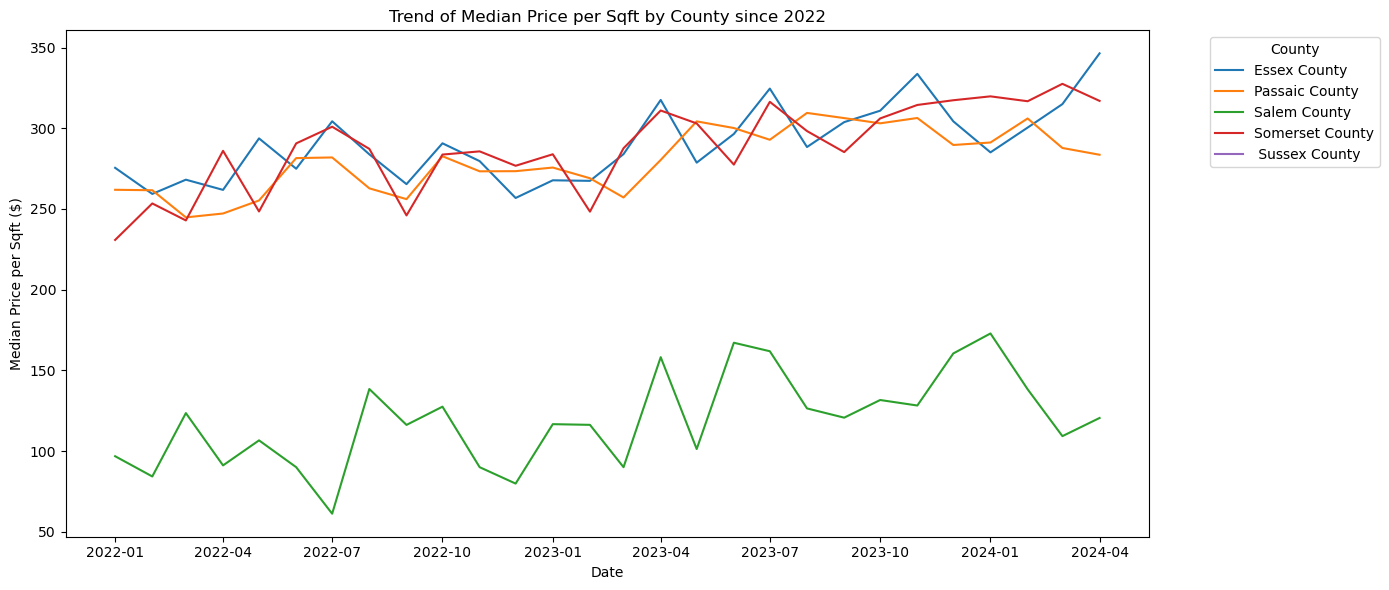

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../resources/fullcleaned_county_market_tracker.csv'
data = pd.read_csv(file_path)

# Convert 'Start Date' to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')

# Filter the data for the selected counties and from 2022 onwards
selected_counties = [ 'Essex County', 'Passaic County', 'Salem County', 'Somerset County' , ' Sussex County']
filtered_data = data[(data['County'].isin(selected_counties)) & (data['Start Date'] >= '2022-01-01')]

# Extract relevant columns for the analysis
filtered_data = filtered_data[['Start Date', 'County', 'Property Type', 'Median Price per Sqft']]

# Remove rows with missing values in the 'Median Price per Sqft' column
filtered_data = filtered_data.dropna(subset=['Median Price per Sqft'])

# Convert 'Median Price per Sqft' to numerical value
filtered_data['Median Price per Sqft'] = filtered_data['Median Price per Sqft'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'County' and 'Property Type' and calculate the median price per sqft
median_price_per_sqft = filtered_data.groupby(['County', 'Property Type'])['Median Price per Sqft'].median().unstack()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(14, 6), facecolor='white')
median_price_per_sqft.plot(kind='bar', ax=ax, width=0.8)

# Add dollar and cents labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='${:.2f}', label_type='edge', color='black')

ax.set_xlabel('County', color='black')
ax.set_ylabel('Median Price per Sqft ($)', color='black')
ax.set_title('Median Price per Sqft by Property Type for Selected Counties since 2022', color='black')
ax.tick_params(axis='x', colors='black', rotation=0)
ax.tick_params(axis='y', colors='black')
ax.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('../resources/County_Comparison_Price_per_Sqft_Bar.png', facecolor='white')
plt.show()

# Plotting the box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_data, x='County', y='Median Price per Sqft', hue='Property Type')
plt.title('Distribution of Median Price per Sqft by Property Type for Selected Counties since 2022')
plt.xlabel('County')
plt.ylabel('Median Price per Sqft ($)')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../resources/County_Comparison_Price_per_Sqft_Box.png', facecolor='white')
plt.show()

# Plotting the line graph
plt.figure(figsize=(14, 6))
for county in selected_counties:
    county_data = filtered_data[filtered_data['County'] == county]
    county_median = county_data.groupby('Start Date')['Median Price per Sqft'].median().reset_index()
    plt.plot(county_median['Start Date'], county_median['Median Price per Sqft'], label=county)

plt.title('Trend of Median Price per Sqft by County since 2022')
plt.xlabel('Date')
plt.ylabel('Median Price per Sqft ($)')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../resources/County_Comparison_Price_per_Sqft_Trend.png', facecolor='white')
plt.show()
